# Regression

Lakukan prediksi jumlah penderita yang positiv covid-19 untuk 5 hari kedepan  menggunakan data harian pada website resmi pemerintah https://www.covid19.go.id/ , dengan mengimplementasikan metode linear atau logistik regression. Buatlah presentasi dalam bentuk video terkait hasil yang didapatkan dan upload ke youtube. Kemudian tuliskan link youtube di lembar jawaban.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
dataset = pd.read_csv("datacorona.csv")

In [4]:
dataset

,index,Tanggal,Jumlah per Hari,Total
0,1,02/03/2020,2,2
1,2,03/03/2020,0,2
2,3,04/03/2020,0,2
3,4,05/03/2020,0,2
4,5,06/03/2020,2,4
...,...,...,...,...
71,72,12/05/2020,484,14749
72,73,13/05/2020,689,15438
73,74,14/05/2020,568,16006
74,75,15/05/2020,490,16496


In [5]:
tanggal = dataset['Tanggal']
x = dataset['index']
y_jml_per_hari = dataset['Jumlah per Hari']
y_total = dataset['Total']

## Menampilkan Scatter Plot Data Jumlah Pertumbuhan Positif Covid-19

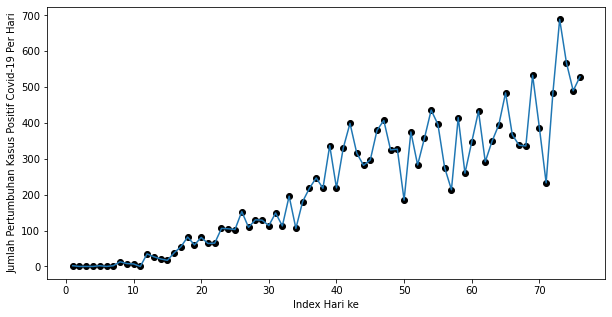

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(
    x,
    y_jml_per_hari,
    c='black'
)
plt.plot(x,y_jml_per_hari)
plt.xlabel('Index Hari ke') 
plt.ylabel('Jumlah Pertumbuhan Kasus Positif Covid-19 Per Hari') 
plt.show()

## Menampilkan Scatter Plot Data Total Kasus Positif Covid-19

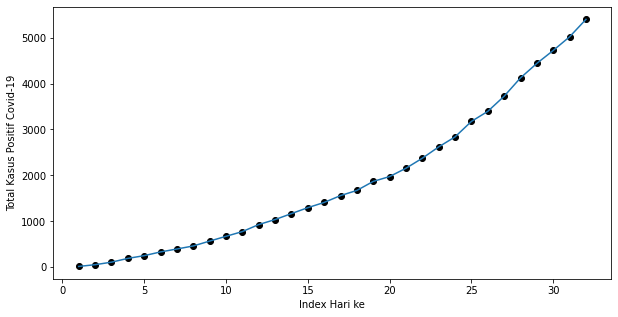

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(
    x,
    y_total,
    c='black'
)
plt.plot(x,y_total)
plt.xlabel('Index Hari ke') 
plt.ylabel('Total Kasus Positif Covid-19') 
plt.show()

In [7]:
prediksi_tanggal = (
    '17 Mei 2020',
    '18 Mei 2020',
    '19 Mei 2020',
    '20 Mei 2020',
    '21 Mei 2020',
)

In [8]:
# Fungsi untuk memprediksi jumlah penderita yang positiv covid-19 untuk 5 hari kedepan
def prediksi(b):
    xi = 77
    for tanggal in prediksi_tanggal:
        yi = b[0] + b[1]*xi
        print(tanggal ,':',int(yi))
        xi += 1

## Implementasi Metode Linear Regression dengan Library LinearRegression

### 1. Jumlah Pertumbuhan Kasus Positif Covid-19

In [9]:
X = x.values.reshape(-1,1)
y_jml = y_jml_per_hari.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y_jml)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -52.092 + 7.1716X


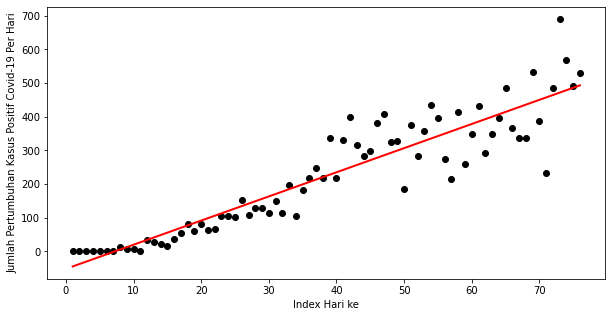

In [10]:
predictions = reg.predict(X)
plt.figure(figsize=(10, 5))
plt.scatter(
    x,
    y_jml_per_hari,
    c='black'
)
plt.plot(
    x,
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel('Index Hari ke') 
plt.ylabel('Jumlah Pertumbuhan Kasus Positif Covid-19 Per Hari') 
plt.show()

In [11]:
X2 = sm.add_constant(X)
est = sm.OLS(y_jml_per_hari, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Jumlah per Hari   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     405.8
Date:                Tue, 19 May 2020   Prob (F-statistic):           9.17e-32
Time:                        22:23:02   Log-Likelihood:                -427.60
No. Observations:                  76   AIC:                             859.2
Df Residuals:                      74   BIC:                             863.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -52.0916     15.775     -3.302      0.0

In [12]:
b_jmlKasusPerHari = [reg.intercept_[0], reg.coef_[0][0]];
# print(b_jmlKasusPerHari)
print('Prediksi Pertumbuhan Jumlah Penderita yang Positif Covid-19 dalam 5 Hari: ')
prediksi(b_jmlKasusPerHari)

Prediksi Pertumbuhan Jumlah Penderita yang Positif Covid-19 dalam 5 Hari: 
17 Mei 2020 : 500
18 Mei 2020 : 507
19 Mei 2020 : 514
20 Mei 2020 : 521
21 Mei 2020 : 528


### 2. Total Kasus Positif Covid-19

In [13]:
XT = x.values.reshape(-1,1)
yT = y_total.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(XT, yT)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -3576.1 + 227.26X


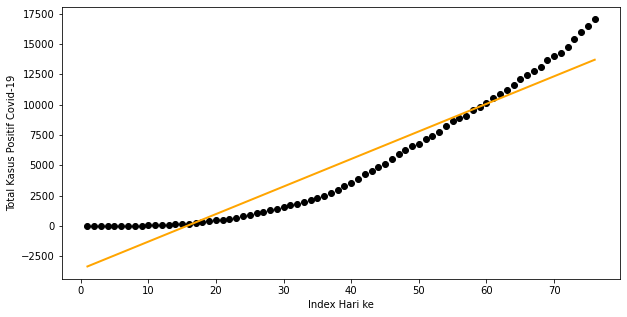

In [14]:
predictions = reg.predict(XT)
plt.figure(figsize=(10, 5))
plt.scatter(
    x,
    y_total,
    c='black'
)
plt.plot(
    x,
    predictions,
    c='orange',
    linewidth=2
)
plt.xlabel('Index Hari ke') 
plt.ylabel('Total Kasus Positif Covid-19') 
plt.show()

In [15]:
XT2 = sm.add_constant(XT)
est = sm.OLS(y_total, XT2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     724.5
Date:                Tue, 19 May 2020   Prob (F-statistic):           5.80e-40
Time:                        22:24:01   Log-Likelihood:                -668.23
No. Observations:                  76   AIC:                             1340.
Df Residuals:                      74   BIC:                             1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3576.1232    374.118     -9.559      0.0

In [16]:
b_total = [reg.intercept_[0], reg.coef_[0][0]];
# print(b_total)
print('Prediksi Pertumbuhan Jumlah Penderita yang Positif Covid-19 dalam 5 Hari: ')
prediksi(b_total)

Prediksi Pertumbuhan Jumlah Penderita yang Positif Covid-19 dalam 5 Hari: 
17 Mei 2020 : 13922
18 Mei 2020 : 14149
19 Mei 2020 : 14377
20 Mei 2020 : 14604
21 Mei 2020 : 14831


## Implementasi Metode Linear Regression

### 1. Jumlah Pertumbuhan Kasus Positif Covid-19 per Hari

In [17]:
def intercept_slope(x, y): 
    n = np.size(x) 
  
    b0 = ((np.sum(y) * np.sum(x*x)) - (np.sum(x) * np.sum(x*y))) / ((n * np.sum(x*x)) - np.power(np.sum(x), 2))
    b1 = ((n * np.sum(x*y)) - (np.sum(x) * np.sum(y))) / ((n * np.sum(x*x)) - np.power(np.sum(x), 2))
  
    return [b0, b1]

def plot_linier_regression(x, y, b, x_label='', y_label=''): 
    plt.figure(figsize=(10, 5))
    plt.scatter(
        x,
        y,
        c = 'black'
    ) 

    Y = b[0] + (b[1] * x)
  
    plt.plot(
        x,
        Y,
        c = 'blue',
        linewidth = 2
    ) 
  
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 
  
    plt.show()
    
def R_squared(x, y_obs, b):
    Y_prediksi = []
    for xi in x:
        yi = b[0] + b[1] * xi
        Y_prediksi.append(yi)
    
    Y_prediksi = np.array(Y_prediksi)
    y_mean = np.mean(y_obs)
    sse = np.sum(np.power(y_obs - Y_prediksi,2))
    tss = np.sum(np.power(y_obs - y_mean,2))
    r_squared = 1 - (sse / tss)
    print('R-Squared = ', r_squared)

Didapatkan Nilai b0 dan b1 adalah
b0 = -52.09157894736842  
b1 = 7.171551606288449
The linear model is: Y = -52.092 + 7.1716X


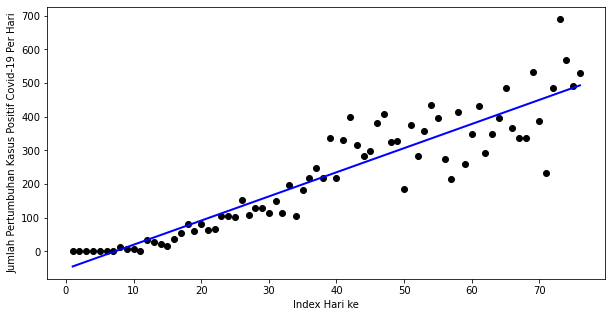

R-Squared =  0.8457789438510672


In [18]:
b_pertumbuhan = intercept_slope(x, y_jml_per_hari)
# print(b_pertumbuhan)
print('Didapatkan Nilai b0 dan b1 adalah')
print("b0 = {}  \nb1 = {}".format(b_pertumbuhan[0], b_pertumbuhan[1])) 
print("The linear model is: Y = {:.5} + {:.5}X".format(b_pertumbuhan[0], b_pertumbuhan[1]))
plot_linier_regression(x, y_jml_per_hari, b_pertumbuhan, 'Index Hari ke', 'Jumlah Pertumbuhan Kasus Positif Covid-19 Per Hari')
R_squared(x, y_jml_per_hari, b_pertumbuhan)

In [19]:
b01 = [b_pertumbuhan[0], b_pertumbuhan[1]];
# print(b01)
print('Prediksi Pertumbuhan Kasus Baru Pada Tanggal: ')
prediksi(b01)

Prediksi Pertumbuhan Kasus Baru Pada Tanggal: 
17 Mei 2020 : 500
18 Mei 2020 : 507
19 Mei 2020 : 514
20 Mei 2020 : 521
21 Mei 2020 : 528


### 2. Total Kasus Positif Covid-19

Didapatkan Nilai b0 dan b1 adalah
b0 = -3576.123157894737  
b1 = 227.25542036910457
The linear model is: Y = -3576.1 + 227.26X


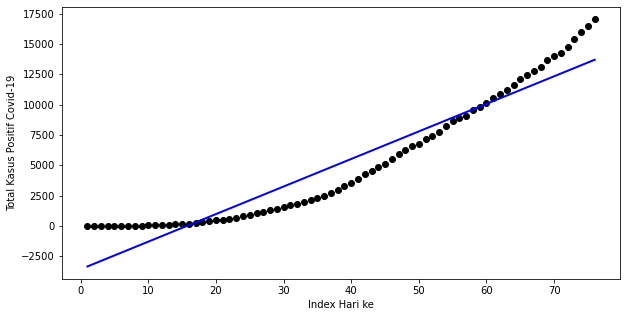

R-Squared =  0.9073271843296369


In [20]:
b_total = intercept_slope(x, y_total)
# print(b_total)
print('Didapatkan Nilai b0 dan b1 adalah')
print("b0 = {}  \nb1 = {}".format(b_total[0], b_total[1])) 
print("The linear model is: Y = {:.5} + {:.5}X".format(b_total[0], b_total[1]))
plot_linier_regression(x, y_total, b_total, 'Index Hari ke', 'Total Kasus Positif Covid-19')
R_squared(x, y_total, b_total)

In [21]:
b_total01 = [b_total[0], b_total[1]];
# print(b01)
print('Prediksi Pertumbuhan Kasus Baru Pada Tanggal: ')
prediksi(b_total01)

Prediksi Pertumbuhan Kasus Baru Pada Tanggal: 
17 Mei 2020 : 13922
18 Mei 2020 : 14149
19 Mei 2020 : 14377
20 Mei 2020 : 14604
21 Mei 2020 : 14831
